## **Summary**
This file includes the general and brief script codes that we used and ran to retrieve data from NCBI and also how we handled them to get dataset 1,2,3, and tables. To know more about the specific details of codes of packages, modules, functionns, etc., you can look up at the git link below:

https://github.com/vy-phung/Haplogroup.git


**CONTENTS:**
1. Get Data from NCBI
* Entrez Direct
* Missing Data
2. Data wrangling
* Dataset 1
* Dataset 2
* Dataset 3
3. Tables
* Isolate Explanation Table
* Table 1
* Table 2
* Table 3 and its subtables

### **1. Get Data from NCBI**

EntrezDirect: https://www.ncbi.nlm.nih.gov/books/NBK179288/

#### **Entrez Direct**

Getting data from keywords "Homo sapiens AND mitochondrion AND </Country Name/>"

In [ ]:
# Download and Install Entrez Direct
!sh -c "$(wget -q https://ftp.ncbi.nlm.nih.gov/entrez/entrezdirect/install-edirect.sh -O -)"
!export PATH=${HOME}/edirect:${PATH}

In [ ]:
# Example of getting Vietnam data
!${HOME}/edirect/esearch -db nucleotide -query "Homo sapiens AND mitochondrion AND Viet Nam" -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Vietnam/old/Vietnam.fasta

In [ ]:
# command line code to get simultaneously mtDNA of 11 countries
! for i in Brunei Cambodia Indonesia Laos Malaysia Myanmar Philippines Singapore Thailand Timor-Leste;
do ${HOME}/edirect/esearch -db nucleotide -query "Homo sapiens AND mitochondrion AND $i" -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/RetrieveData/OldCountryFasta/$i.fasta;
done

In [ ]:
script = '''#!/bin/bash
# Download and Install Entrez Direct
sh -c "$(wget -q https://ftp.ncbi.nlm.nih.gov/entrez/entrezdirect/install-edirect.sh -O -)"
export PATH=${HOME}/edirect:${PATH}

# run code to get data of 11 countries
DataList=/content/drive/MyDrive/OUCRUwork/RetrieveData/others/extraData/countries.txt
Field_Separator=$IFS
IFS=,
for val in `cat $DataList`
do ${HOME}/edirect/esearch -db nucleotide -query "Homo sapiens AND mitochondrion AND $val" -sort "Date Released" | ${HOME}/edirect/efetch -format fasta
> /content/drive/MyDrive/RetrieveData/OldCountryFasta/$val.fasta;
done
'''
saveFile('/content/drive/MyDrive/OUCRUwork/RetrieveData/others/codes/NCBIBash.sh', script)

In [ ]:
! cat /content/drive/MyDrive/OUCRUwork/RetrieveData/others/extraData/countries.txt

Brunei,Cambodia,Indonesia,Laos,Malaysia,Myanmar,Philippines,Singapore,Thailand,Timor-Leste,Viet Nam


Gaining the data from the above common keywords still missed more data if we search the keywords specifically. Therfore, below is the the way we got each specific country

#### **Missing data**

Myanmar </br>
New Data:
- 21219640.Inland post-glacial dispersal in East Asia revealed by mitochondrial haplogroup M9a'b: Myanmar, Vietnam (filter them): keywords for Myanmar: HM346895, HM346896
- 24467713.Summerer et al. (2014).txt: Myanmar: missing 327 small coding region JX288765-JX289091 among 371 files of this article (keywords: Large-scale mitochondrial DNA analysis in Southeast Asia reveals evolutionary effects of cultural isolation in the multi-ethnic population of Myanmar)
- 25826227.Li et al. (2015).txt: all 937 files for Myanmar but only 92 files exist (keywords: Ancient inland human dispersals from Myanmar into interior East Asia since the Late Pleistocene)


In [ ]:
! for i in HM346895 HM346896; do ${HOME}/edirect/esearch -db nucleotide -query $i -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Myanmar/extra/$i.fasta; done

In [ ]:
! ${HOME}/edirect/esearch -db nucleotide -query "Large-scale mitochondrial DNA analysis in Southeast Asia reveals evolutionary effects of cultural isolation in the multi-ethnic population of Myanmar" -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Myanmar/extra/$i.fasta

In [ ]:
! ${HOME}/edirect/esearch -db nucleotide -query "Ancient inland human dispersals from Myanmar into interior East Asia since the Late Pleistocene" -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Myanmar/extra/$i.fasta

Philippines </br>
New data:
+ 21281460.Loo et al. (2011).txt: all 46 files for Philip but only exist 12 (keyword: Genetic affinities between the Yami tribe people of Orchid Island and the Philippine Islanders of the Batanes archipelago and Philippines)
+ 21796613.Scholes et al. (2011).txt: 60 files for Philip but only exist 9 (keywords: Genetic diversity and evidence for population admixture in Batak Negritos from Palawan)
+ Philippines: '28535779.Carriers of mitochondrial DNA macrohaplogroup R colonized Eurasia.Larruga et al. (2017)': keywords: "Carriers of mitochondrial DNA macrohaplogroup R colonized Eurasia AND Philippines"

In [ ]:
!${HOME}/edirect/esearch -db nucleotide -query 'Genetic affinities between the Yami tribe people of Orchid Island and the Philippine Islanders of the Batanes archipelago and Philippines' -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Philippines/extra/Philippines2.fasta

In [ ]:
!${HOME}/edirect/esearch -db nucleotide -query 'Genetic diversity and evidence for population admixture in Batak Negritos from Palawan' -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Philippines/extra/Philippines2.fasta

In [ ]:
!${HOME}/edirect/esearch -db nucleotide -query 'Carriers of mitochondrial DNA macrohaplogroup R colonized Eurasia AND Philippines' -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Philippines/extra/Philippines2.fasta

Singapore
New data:
+ 36382667.Sui et al. (2023).txt: there are 7 and already exist 5 so there are 2 more but no idea if these 2 ref seqs are from Singapore or not (keywords: Death associated protein‑3 (DAP3) and DAP3 binding cell death enhancer‑1 (DELE1) in human colorectal cancer, and their impacts on clinical outcome and chemoresistance)
+ 37025097.Zhao et al. (2023).txt: 14 files and already exist 11 files but don’t know about the other 3 belongs to Singapore or not

In [ ]:
!${HOME}/edirect/esearch -db nucleotide -query "Death associated protein‑3 (DAP3) and DAP3 binding cell death enhancer‑1 (DELE1) in human colorectal cancer, and their impacts on clinical outcome and chemoresistance" -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Singapore/extra/Singapore2.fasta

In [ ]:
!${HOME}/edirect/esearch -db nucleotide -query "Effect of COP1 in Promoting the Tumorigenesis of Gastric Cancer by Down-Regulation of CDH18 via PI3K/AKT Signal Pathway" -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Singapore/extra/Singapore2.fasta

Thailand </br>
New data:
+ 11310578.Mitochondrial DNA polymorphisms in Thailand.Fucharoen et al. (2001)
+ 19148289.The Peopling of Korea Revealed by Analyses of Mitochondrial DNA and Y-Chromosomal Markers.Jin et al. (2009): Thai (80, keyword: The Peopling of Korea Revealed by Analyses of Mitochondrial DNA and Y-Chromosomal Markers and Thailand), Vietnam (84, keyword: Viet Nam)
+ 27837350.Complete mitochondrial genomes of Thai and Lao populations indicate an ancient origin of Austroasiatic groups and demic diffusion in the spread of Tai–Kadai languages. Kutanan et al. (2017): Thai, Lao (search on the table of isolate name): total 1234
+ 32304863.A Matrilineal Genetic Perspective of Hanging Coffin
Custom in Southern China and Northern Thailand (its old name is Unpublished.The Population History and Cultural Dispersal Pattern of Hanging.Zhang et al. (2020))


In [ ]:
!${HOME}/edirect/esearch -db nucleotide -query 'Mitochondrial DNA polymorphisms in Thailand' -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Thailand/extra/Thailand2.fasta

In [ ]:
# getting new data
!${HOME}/edirect/esearch -db nucleotide -query 'The Peopling of Korea Revealed by Analyses of Mitochondrial DNA and Y-Chromosomal Markers AND Thailand ' -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Thailand/extra/Thailand2.fasta

In [ ]:
'''27837350.Complete mitochondrial genomes of Thai and Lao populations indicate an ancient origin of Austroasiatic groups and demic diffusion in the
spread of Tai–Kadai languages. Kutanan et al. (2017): Thai, Lao (search on the table of isolate name):
total 1234: Laos: LUA101-LUA149: LA1 + VIE101-VIE149: LA2; the others are Thai'''
# download data for both Thai and Lao
!${HOME}/edirect/esearch -db nucleotide -query "Complete mitochondrial genomes of Thai and Lao populations indicate an ancient origin of Austroasiatic groups and demic diffusion in the spread of Tai–Kadai languages " -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Laos/extra/Laos_Thai.fasta

In [ ]:
!${HOME}/edirect/esearch -db nucleotide -query "The Population History and Cultural Dispersal Pattern of Hanging" -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/RetrieveData/Dataset1/Thailand/extra/Thailand.fasta

Laos </br>
New Data:
- 21333001.Southeast Asian diversity: first insights into the complex mtDNA structure of Laos.Bodner et al. (2011): 214

In [ ]:
!${HOME}/edirect/esearch -db nucleotide -query "Southeast Asian diversity: first insights into the complex mtDNA structure of Laos" -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Laos/extra/Laos_Thai.fasta

Timor
New data:
+ Genetic admixture history of Eastern Indonesia as revealed by Y-chromosome and mitochondrial DNA analysis.Mona et al. (2009): No clear location/country but this article includes for countries: Indo, Timor (330 files)
+ 25757516.Gomes et al. (2015).txt: this study has 324 files which are all from East Timor (Timor-Leste) (KJ655583-KJ655889: D-loop, KJ676774-KJ676790: complete genome) (keywords: Human settlement history between Sunda and Sahul: a focus on East Timor (Timor-Leste) and the Pleistocenic mtDNA diversity)

In [ ]:
!${HOME}/edirect/esearch -db nucleotide -query 'Genetic admixture history of Eastern Indonesia as revealed by Y-chromosome and mitochondrial DNA analysis' -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Timor-Leste/extra/Timor2.fasta

In [ ]:
# getting new data
!${HOME}/edirect/esearch -db nucleotide -query 'Human settlement history between Sunda and Sahul: a focus on East Timor (Timor-Leste) and the Pleistocenic mtDNA diversity' -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Timor-Leste/extra/Timor2.fasta

Viet Nam </br>
New data:
+ 21219640.Inland post-glacial dispersal in East Asia revealed by mitochondrial haplogroup M9a'b: Myanmar, Vietnam: keywords for VN: HM346881, HM346883, HM346885, HM346886, HM346889
+ .Direct Submission.VN.Phan et al. (2016): Vietnam (DQ834255, DQ834258)
+ 19148289.The Peopling of Korea Revealed by Analyses of Mitochondrial DNA and Y-Chromosomal Markers.Jin et al. (2009): Vietnam (84, keyword: The Peopling of Korea Revealed by Analyses of Mitochondrial DNA and Y-Chromosomal Markers and Viet Nam)
+ 20513740.Tracing the Austronesian footprint in Mainland Southeast Asia: a perspective from mitochondrial DNA.Peng et al. (2010): 335 (Cham+Kinh)
+ '.Direct Submission.Phan et al. (2016)': there are 10 files for VN if search by keyword “Phan (2016) AND Homo sapiens AND mitochondrion” and among them already existed 2 files. They dont have a title for this so I still cannot find the article and there is no explanation for the isolate; the isolate only has “VN”

In [ ]:
! for i in HM346881 HM346883 HM346885 HM346886 HM346889; do ${HOME}/edirect/esearch -db nucleotide -query $i -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Vietnam/extra/$i.fasta; done

In [ ]:
! for i in DQ834255 DQ834258; do ${HOME}/edirect/esearch -db nucleotide -query $i -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Vietnam/extra/$i.fasta; done

In [ ]:
!${HOME}/edirect/esearch -db nucleotide -query 'The Peopling of Korea Revealed by Analyses of Mitochondrial DNA and Y-Chromosomal Markers AND Viet Nam' -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Vietnam/extra/Vietnam2.fasta

In [ ]:
# getting new data
!${HOME}/edirect/esearch -db nucleotide -query 'Tracing the Austronesian footprint in Mainland Southeast Asia: a perspective from mitochondrial DNA' -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Vietnam/extra/Vietnam2.fasta

In [ ]:
!${HOME}/edirect/esearch -db nucleotide -query "Phan (2016) AND Homo sapiens AND mitochondrion" -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/RetrieveData/Dataset1/Vietnam/extra/Vietnam.fasta

Malaysia </br>
1. Search term "Single, rapid coastal settlement of Asia revealed by analysis of complete mitochondrial genomes AND Malaysia ":
- Miss data for Malaysia which is 267 files but all are control region
2. Search term "Single, rapid coastal settlement of Asia revealed by analysis of complete mitochondrial genomes AND Malay":
- Miss 4 complete genome of Malaysia: </br>
2: 9_N21(Tor57), 10_M21c(Tor61): Aboriginal Malay (Semelai) (using key word Malay) </br>
2: 7_N22(Tor55), 12_M22(Tor63): Aboriginal Malay (Temuan) (using key word Malayu)
3. 16982817.Hill et al. (2006): 6 files and one of them which is ORA131B already exist but the other not (keywords: Phylogeography and ethnogenesis of aboriginal Southeast Asians AND Malaysia)
4. 22729749.Evolutionary history of continental southeast asians: 'early train' hypothesis based on genetic analysis of mitochondrial and autosomal
DNA data.Jinam et al. (2012): Malay: 86 genome: 23 Bidayuh (BD); 24 Jehai (JH); 21 Seletar (SL); 18 Temuan (TM)

In [ ]:
# add more 267 files having control region for Malaysia
!${HOME}/edirect/esearch -db nucleotide -query "Single, rapid coastal settlement of Asia revealed by analysis of complete mitochondrial genomes AND Malaysia " -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/RetrieveData/others/extraData/Malaysia_extra.fasta

In [ ]:
# add more files for complete genome of Malaysia (using key word Malay) (3 files)
!${HOME}/edirect/esearch -db nucleotide -query "Single, rapid coastal settlement of Asia revealed by analysis of complete mitochondrial genomes AND Malay " -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/RetrieveData/others/extraData/Malaysia_extra_complete.fasta

In [ ]:
# using key word Malayu (2 files)
!${HOME}/edirect/esearch -db nucleotide -query "Single, rapid coastal settlement of Asia revealed by analysis of complete mitochondrial genomes AND Malayu " -sort "Date Released" | ${HOME}/edirect/efetch -format fasta >> /content/drive/MyDrive/RetrieveData/others/extraData/Malaysia_extra_complete.fasta

In [ ]:
!${HOME}/edirect/esearch -db nucleotide -query "Phylogeography and ethnogenesis of aboriginal Southeast Asians AND Malaysia" -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Malaysia/extra/Malaysia3.fasta

In [ ]:
!${HOME}/edirect/esearch -db nucleotide -query "Evolutionary history of continental southeast asians: 'early train' hypothesis based on genetic analysis of mitochondrial and autosomal DNA data " -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Malaysia/extra/Malaysia3.fasta

Indonesia </br>
New Data:
- '21407194.Larger mitochondrial DNA than
Y-chromosome differences between.Gunnarsdottir et al. (2011)'. Key word: Larger mitochondrial DNA than Y-chromosome differences between matrilocal and patrilocal groups from Sumatra (72 files)
- 21407194.Gunnarsdottir et al. (2011): HM596654
- 16982817.Hill et al. (2006): 97 files and 4 of them exist (DQ981465-68), the others not (keyword: Phylogeography and ethnogenesis of aboriginal Southeast Asians AND Indonesia)
- Unpublished.Ngili et al. (2009).txt: all 206 files from Indonesia (check lại có duplicate với old data ko)

In [ ]:
# downloading data
!${HOME}/edirect/esearch -db nucleotide -query "Larger mitochondrial DNA than Y-chromosome differences between matrilocal and patrilocal groups from Sumatra" -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/RetrieveData/Dataset1/Indonesia/extra/Indonesia.fasta

In [ ]:
!${HOME}/edirect/esearch -db nucleotide -query "HM596654" -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/RetrieveData/Dataset1/Indonesia/extra/Indonesia.fasta

In [ ]:
!${HOME}/edirect/esearch -db nucleotide -query "Phylogeography and ethnogenesis of aboriginal Southeast Asians AND Indonesia" -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/RetrieveData/Dataset1/Indonesia/extra/Indonesia.fasta

In [ ]:
!${HOME}/edirect/esearch -db nuccore -query "Ngili (2009)" -sort "Date Released" | ${HOME}/edirect/efetch -format fasta > /content/drive/MyDrive/Database/Dataset1/Indonesia/extra/Indonesia3.fasta

### **2. Data wrangling**

#### **Dataset1**
This folder includes only unique data which still have reference sequences, D-loop, non-homosapien, etc.

**Instruction of SplitSeq**</br>
**1. Code:** </br>
`SplitSeq(nameFile, country,seqFolder,seqNameFolder,newCountryFasta, exist)`

  **Explanation:**
  - **nameFile:** input file
  - **country:** the country of the input file to run
  - **seqFolder:** name of folder of the output fasta files after running and splitting files
  - **seqNameFolder:** name of another folder which saves the others besides the above output. For example, after running ReadSummary, this will hold the results of reference aritlces such as authors, titles, pubmedID, etc.
  - **newCountryFasta**: a name of folder that we saved a big new fasta file which has the same collected sequences from NCBI, but the difference is they were labellee by the order "Country.Isolate.AccessionNumber.Haplogroup"
  - **exist:** Only receiving "Yes" or "No". "Yes" means some sequences in a big input fasta file had been processed or already existed, and therefore the function only runs the left over ones. "No" means there is no sequences of the input file existed or processed.

2. **Running Code** </br>
- Click the circle button having an arrow. If it runs sucessfully, it appears the green mark
  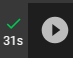

In [ ]:
# Download and Install Entrez Direct
!sh -c "$(wget -q https://ftp.ncbi.nlm.nih.gov/entrez/entrezdirect/install-edirect.sh -O -)"
!export PATH=${HOME}/edirect:${PATH}


Entrez Direct has been successfully downloaded and installed.

In order to complete the configuration process, please execute the following:

  echo "export PATH=/root/edirect:\${PATH}" >> ${HOME}/.bashrc

or manually edit the PATH variable assignment in your .bashrc file.

Would you like to do that automatically now? [y/N]
y
OK, done.

To activate EDirect for this terminal session, please execute the following:

export PATH=${HOME}/edirect:${PATH}



In [ ]:
# Run this cell to do the splitSeq
# Download haplogrep
!curl -sL haplogrep.now.sh | bash

In [ ]:
# check again how to import module.py
from DataWrangling.Dataset1 import *
# example of one Brunei file having the name: >KU521409.1 Homo sapiens isolate BRU40 haplogroup B4c1b2a2 mitochondrion, complete genome
nameFile = '/content/drive/MyDrive/OUCRUwork/RetrieveData/Dataset1/Brunei/old/Brunei.fasta'
country = 'Brunei'
seqFolder = '/content/drive/MyDrive/OUCRUwork/RetrieveData/Dataset1/Brunei/fasta/'
seqNameFolder = '/content/drive/MyDrive/OUCRUwork/RetrieveData/Dataset1/Brunei/'
newCountryFasta = '/content/drive/MyDrive/OUCRUwork/RetrieveData/Dataset1/Brunei/new/'
exist = 'No'
splitSeq(nameFile, country, seqFolder,seqNameFolder,newCountryFasta, exist)

#### **Dataset2**

In [ ]:
from DataWrangling.Dataset2_3 import *
# run script here
remove(CountryFolder, country)

#### **Datatset3**
Remove Control Region of Dataset 2, and remain complete genome

In [ ]:
# run script here
removeControlReg(country)

### **3. Tables**

Summary: In folder RetrieveData/others, there is a file named translation.txt. In this file, I wrote down the explanation of all isolates of 4932 sequences. Then, I will use this file to help me run the function for creating the table and file "Changed_SEA_Haplogroup.xlsx"

Functions prepare for getting information of isolate and catergorize explanation, language family, ethnicity, ...

In [ ]:
from Tables import *

In [ ]:
# run script here
trans = 'AC06: Acheh-Kedah Yan (location); BJ120, BJ136: Banjar Perak Kuala Kurau (location); BG104: Bugis Johor Pontian (location: Johor Pontian, ethnic: Bugis); JW78: Johor Muar Jawa (location); JW73: Johor Semerah Jawa (location); MB15: Kelantan Kota Bahru (location); RP04, RP26: Kelantan RantauPanjang (location); KK136, KK172, KK2, KK23, KK48, KK49, KK96: Kota Kinabalu (Borneo) (location); MI51, MI58: Minangkabau-Negeri Sembilan Lenggeng (location: Minangkabau-Negeri Sembilan Lenggeng, ethnic: Minangkabau); 100B: Semelai (ethnic, language)'
iso = 'RP04'
ham_dis(trans,iso)

#### **Isolate Explanation Table**

In [ ]:
# run script here
from Tables.IsoTab import *
import pandas as pd
countries = 'Brunei Cambodia Indonesia Laos Malaysia Myanmar Philippines Singapore Thailand Timor-Leste Vietnam'
output = ''
for country in countries.split():
  table = explainIso(country)
  df = IsoTab(table,country)
  if len(output) < 1:
    output =df
  else:
    output = pd.concat([output,df])
  print('finish',country)
output.to_excel('/content/drive/MyDrive/OUCRUwork/RetrieveData/tables/IsolateExplanation.xlsx')

Adding polymorphism

In [ ]:
def polymorphism(Input): # the dataset 3: 4932 seq and put them in a 4932-table
  listInput = ','.join(openFile(Input).split('\n')[:-1])
  saveFile('listInput.txt',listInput)
  script = '''#!/bin/bash
    DataList=listInput.txt
    Field_Separator=$IFS
    IFS=,
    for val in `cat $DataList`
    do ./haplogrep classify --in $val --format fasta --extend-report --output $val.txt
    done'''
  saveFile('/content/drive/MyDrive/OUCRUwork/RetrieveData/others/codes/4932polymorphism.sh',script)
  ! bash /content/drive/MyDrive/OUCRUwork/RetrieveData/others/codes/4932polymorphism.sh

In [ ]:
# run script here
from Tables.IsoTab import polymorphism.tablePoly

#### **Table1**

In [ ]:
# run script here
from Tables.tables import table1
countries = 'Brunei Cambodia Indonesia Laos Malaysia Myanmar Philippines Singapore Thailand Timor-Leste Vietnam'
for country in countries.split():
  data = table1(country)
  data.to_csv('/content/drive/MyDrive/RetrieveData/tables/table1/'+country+'1.csv')
  print(country,'finish')
# merge all 11 countries
countries = 'Cambodia Indonesia Laos Malaysia Myanmar Philippines Singapore Thailand Timor-Leste Vietnam'
df = pd.read_csv('/content/drive/MyDrive/RetrieveData/tables/table1/Brunei1.csv')
for country in countries.split():
  df1 = pd.read_csv('/content/drive/MyDrive/RetrieveData/tables/table1/'+country+'1.csv')
  df = pd.concat([df, df1], ignore_index=True, sort=False)
# save the total 11 countries files
df = df.fillna(0)
df = df.replace(0,'-')
df.to_csv('/content/drive/MyDrive/RetrieveData/tables/SEA_haplogroups.csv')

#### **Table2**

In [ ]:
# run script here
from Tables.tables import table2
table2 = table2('/content/drive/MyDrive/RetrieveData/tables/table2/Haplogroups.csv')
table2.to_csv('/content/drive/MyDrive/RetrieveData/tables/table2/Haplofrequency.csv')

#### **Table 3 and its subtables**
- Table 3a,d: country + ethnicity
- Table 3b: ethnicity
- Table 3c: language family

In [ ]:
# run script here
from Tables.tables.table3 import table3
countries = 'Brunei Cambodia Indonesia Laos Malaysia Myanmar Philippines Singapore Thailand Timor-Leste Vietnam table'
for country in countries.split():
  data = table3(country)
  data = data.set_index('Haplogroup')
  data.to_csv('/content/drive/MyDrive/OUCRUwork/RetrieveData/tables/table3/countries/'+country+'3.csv')
  print(country, 'finish')

Table 3a,d

In [ ]:
# run script here
from Tables.tables.table3 import createTable3ad
countries = 'Brunei Cambodia Indonesia Laos Malaysia Myanmar Philippines Singapore Thailand Timor-Leste Vietnam'
data = ''
groups = ['Country','Language family']
for country in countries.split():
  df = createTable3ad(country,groups,'/content/drive/MyDrive/OUCRUwork/RetrieveData/tables/table1/Changed_SEA_haplogroups.csv',groups[-1])
  if len(data) < 1:
    data = df
  else:
    add = df.drop(['Haplogroup'],axis=1)
    data = pd.concat([data,add],axis=1)
  print(country,'finish')

In [ ]:
data.to_excel('/content/drive/MyDrive/OUCRUwork/RetrieveData/tables/table3/table3d.xlsx')

Table 3b,c

In [ ]:
# run script here
from Tables.tables.table3 import createTable3bc

In [ ]:
groups = ['Ethnicity']
data = createTable3b(groups,'/content/drive/MyDrive/OUCRUwork/RetrieveData/tables/table1/Changed_SEA_haplogroups.csv','Ethnicity')
data.to_excel('/content/drive/MyDrive/OUCRUwork/RetrieveData/tables/table3/table3b.xlsx')

In [ ]:
groups = ['Language family']
data = createTable3b(groups,'/content/drive/MyDrive/OUCRUwork/RetrieveData/tables/table1/Changed_SEA_haplogroups.csv','Language family')
data.to_excel('/content/drive/MyDrive/OUCRUwork/RetrieveData/tables/table3/table3c.xlsx')